In [175]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from scipy.stats import ttest_ind

%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12, 8) # Adjusts configuration of plots 

pd.set_option('display.max_rows', 20)

In [176]:
# Read in the data

df = pd.read_csv('movies.csv')



In [177]:
# Look at data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [178]:
# See if any missing data


for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}')

df = df.dropna() # just remove row if missing, come back to later maybe




name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [179]:
# Data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [180]:
# change datatype of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')



In [181]:
# create correct year column
df['yearcorrect'] = df['released'].astype(str).str.split().str[2]

In [182]:
# Order by gross revenue

df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [183]:
# Drop duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


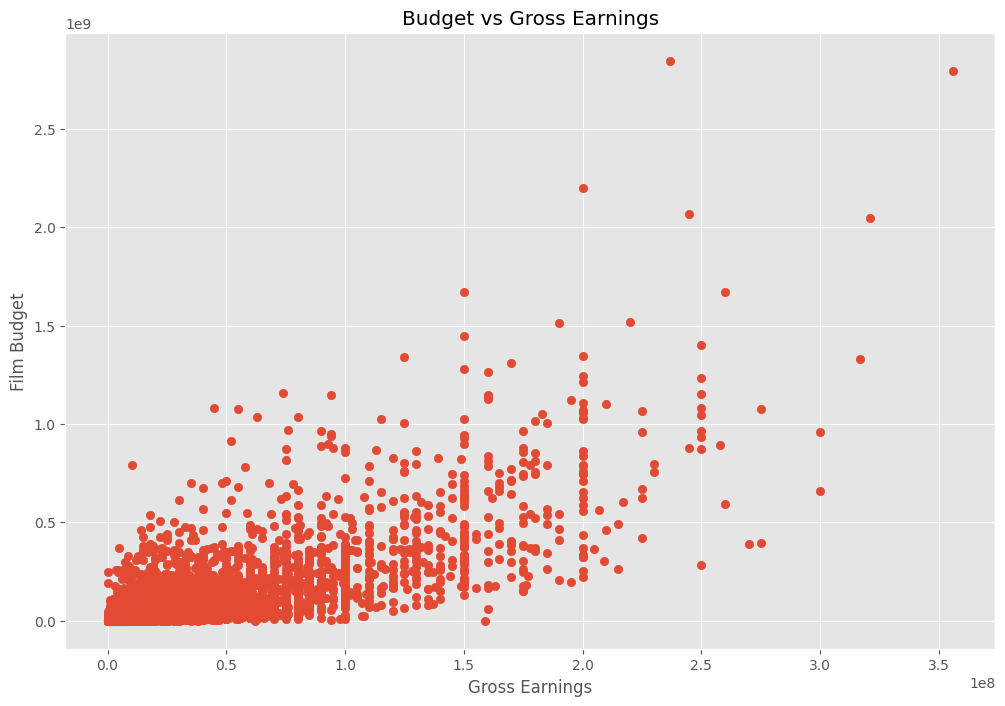

In [184]:
# Scatter plot budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

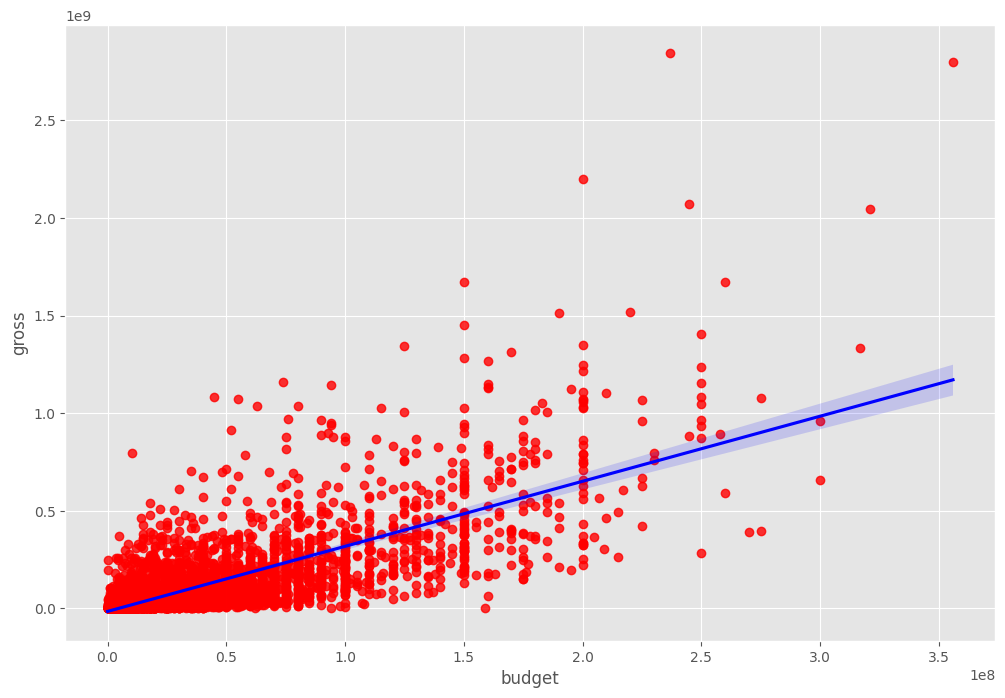

In [185]:
# Plot budget vs gross with seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

In [186]:
# Correlation

df.corr(numeric_only = True, method='pearson')



,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


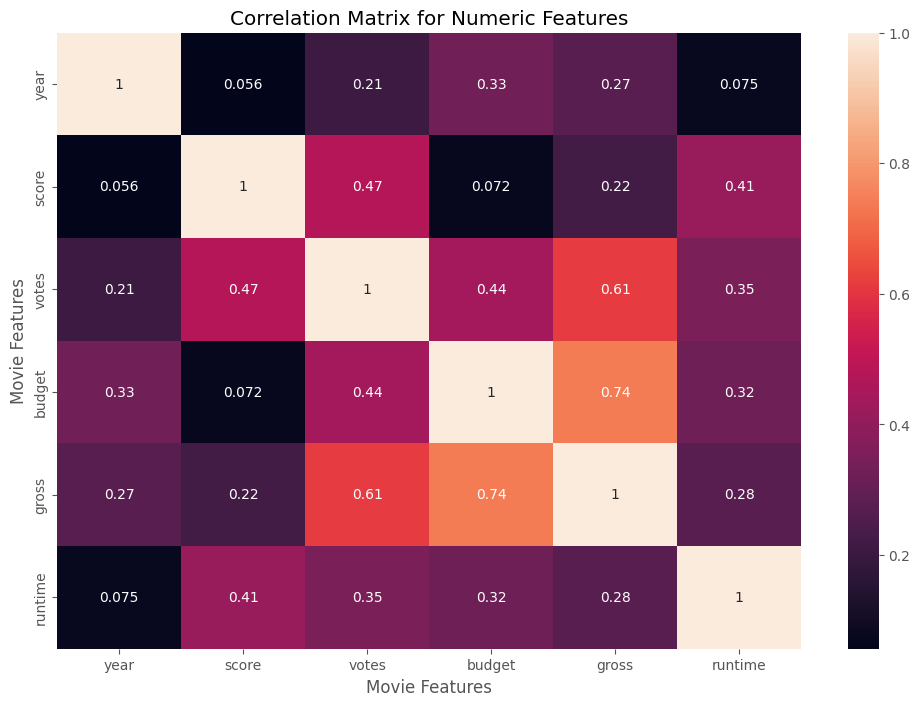

In [187]:
# Correlation Matrix

correlation_matrix = df.corr(numeric_only=True, method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [188]:
# Company

df.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [189]:
df_numerized = df


for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'): 
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,31
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,41
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,19
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,37
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,40


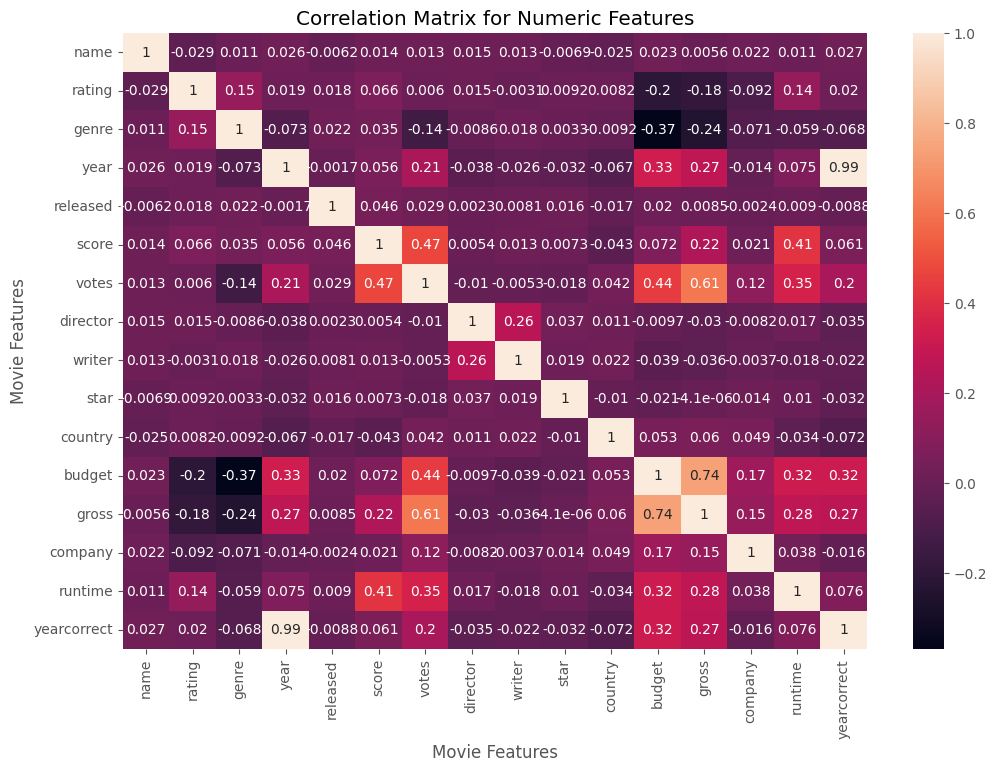

In [190]:
# Correlation Matrix Numerized


correlation_matrix = df.corr(numeric_only=True, method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [191]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.026784
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.019749
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.067962
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.994821
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.008821
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061059
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.202953
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.035162
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.022050
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.031631


In [192]:
corrs = df.corr(numeric_only=True)

corr_pairs = corrs.unstack()

corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
                              ...   
yearcorrect  budget         0.320216
             gross          0.268367
             company       -0.016150
             runtime        0.076203
             yearcorrect    1.000000
Length: 256, dtype: float64

In [193]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
                              ...   
star         star           1.000000
company      company        1.000000
gross        gross          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [194]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.994821
                              ...   
star         star           1.000000
company      company        1.000000
gross        gross          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 22, dtype: float64

TtestResult(statistic=np.float64(-40.57852587869029), pvalue=np.float64(0.0), df=np.float64(10840.0))